<a href="https://colab.research.google.com/github/KondoKoyo/EU_M_Math/blob/main/Chap09_2_2~3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series,DataFrame
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

import sklearn

%precision 3


'%.3f'

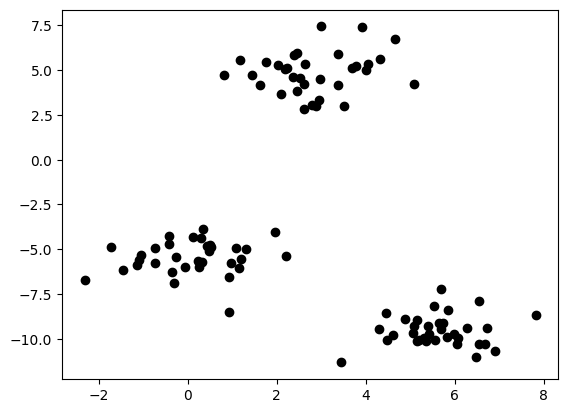

In [4]:
# 9-2-2
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
X,_ = make_blobs(random_state=10)
plt.scatter(X[:,0],X[:,1],color = 'black')

In [9]:
# 9-2-2
klearns  = KMeans(init='random',n_clusters=3)
klearns.fit(X)
y_pred = klearns.predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


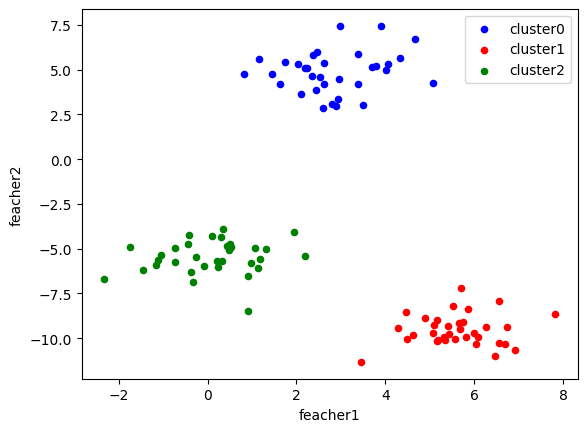

In [10]:
# 9-2-2
merge_data = pd.concat([pd.DataFrame(X[:,0]),pd.DataFrame(X[:,1]),pd.DataFrame(y_pred)],axis=1)

merge_data.columns = ['feacher1','feacher2','cluster']

ax = None
colors = ['blue','red','green']

for i, data in merge_data.groupby('cluster'):
    ax = data.plot.scatter(x='feacher1',y='feacher2',color=colors[i],label = f'cluster{i}',ax=ax)


In [11]:
# 9-2-3
import requests,zipfile
import io

url  = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip'
r = requests.get(url,stream = True)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()
bank = pd.read_csv('bank-full.csv',sep = ';')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [12]:
# 9-2-3
from sklearn.preprocessing import StandardScaler
bank_sub = bank[['age','balance','campaign','previous']]
sc = StandardScaler()
sc.fit(bank_sub)
bank_sub_std = sc.transform(bank_sub)
bank_sub.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       45211 non-null  int64
 1   balance   45211 non-null  int64
 2   campaign  45211 non-null  int64
 3   previous  45211 non-null  int64
dtypes: int64(4)
memory usage: 1.4 MB


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


cluster_number
2    16412
0    27060
1     1739
Name: count, dtype: int64


Text(0, 0.5, 'count')

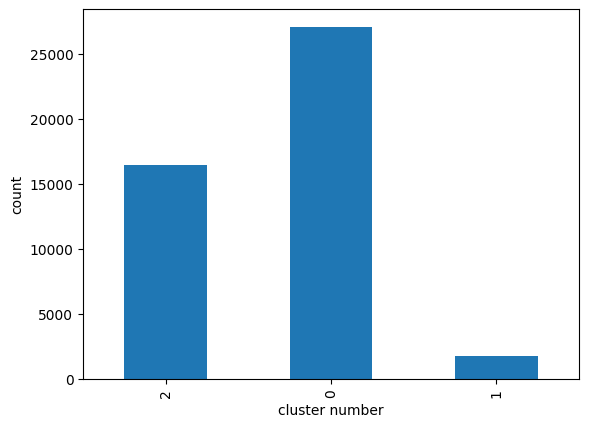

In [13]:
# 9-2-3
kmeans = KMeans(n_clusters=3,init = 'random',random_state = 0)
kmeans.fit(bank_sub_std)
labels = pd.Series(kmeans.labels_,name = 'cluster_number')
print(labels.value_counts(sort=False))

ax = labels.value_counts(sort=False).plot(kind = 'bar')
ax.set_xlabel('cluster number')
ax.set_ylabel('count')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'Distortion')

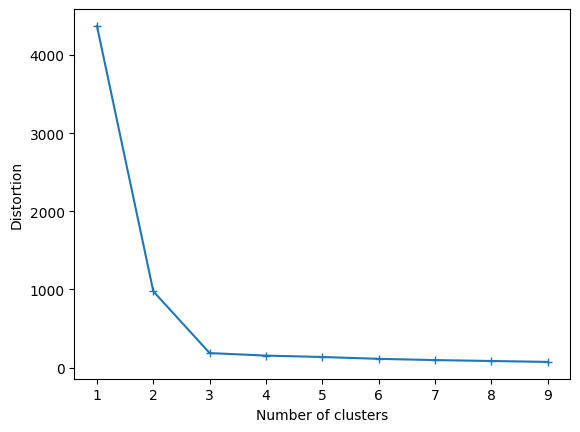

In [14]:
# 9-2-3
dist_list=[]
for i in range(1,10):
    kmeans = KMeans(n_clusters=i,init = 'random',random_state = 0)
    kmeans.fit(X)
    dist_list.append(kmeans.inertia_)


plt.plot(range(1,10),dist_list,marker = '+')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'Distortion')

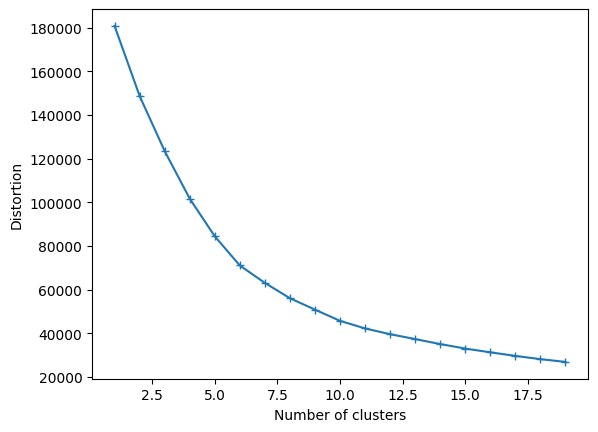

In [15]:
dist_list = []
for i in range(1,20):
    kmeans = KMeans(n_clusters=i,init = 'k-means++',random_state = 0)
    kmeans.fit(bank_sub_std)
    dist_list.append(kmeans.inertia_)


plt.plot(range(1,20),dist_list,marker = '+')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')

相関関数{:.3f}: 0.8893899540010721


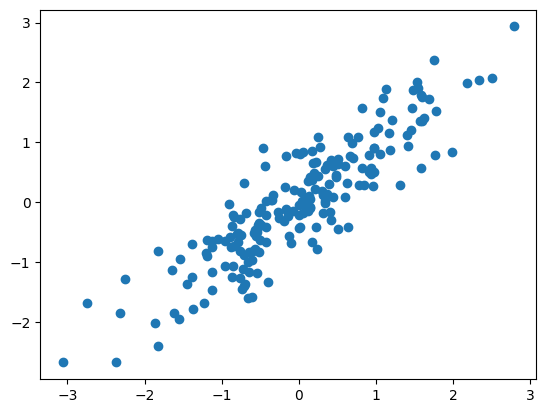

In [16]:
# 9-3-1
from sklearn.preprocessing import StandardScaler

sample = np.random.RandomState(1)

X=np.dot(sample.rand(2,2),sample.randn(2,200)).T

sc = StandardScaler()
X_std = sc.fit_transform(X)

print('相関関数{:.3f}:',format(sp.stats.pearsonr(X_std[:,0],X_std[:,1])[0]))
plt.scatter(X_std[:,0],X_std[:,1])

In [17]:
# 9-3-1
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X_std)
print(pca.components_)
print('各成分の分散：{}'.format(pca.explained_variance_))


[[-0.707 -0.707]
 [-0.707  0.707]]
各成分の分散：[1.899 0.111]


In [18]:
print('各成分の分散割合：{}'.format(pca.explained_variance_ratio_))

各成分の分散割合：[0.945 0.055]


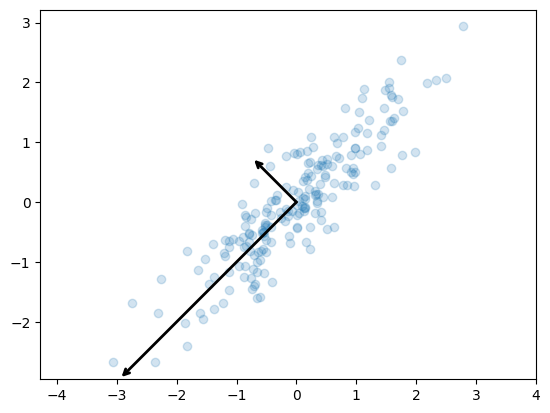

In [19]:
#9-3-1
arrowprops = dict(arrowstyle = '->',linewidth =2,shrinkA = 0,shrinkB =0)

def draw_vector(v0,v1):
    plt.gca().annotate('',v1,v0,arrowprops=arrowprops)

plt.scatter(X_std[:,0],X_std[:,1],alpha=0.2)
for length,vector in zip(pca.explained_variance_,pca.components_):
    v = vector*3*np.sqrt(length)
    draw_vector(pca.mean_,pca.mean_+v)
plt.axis('equal');

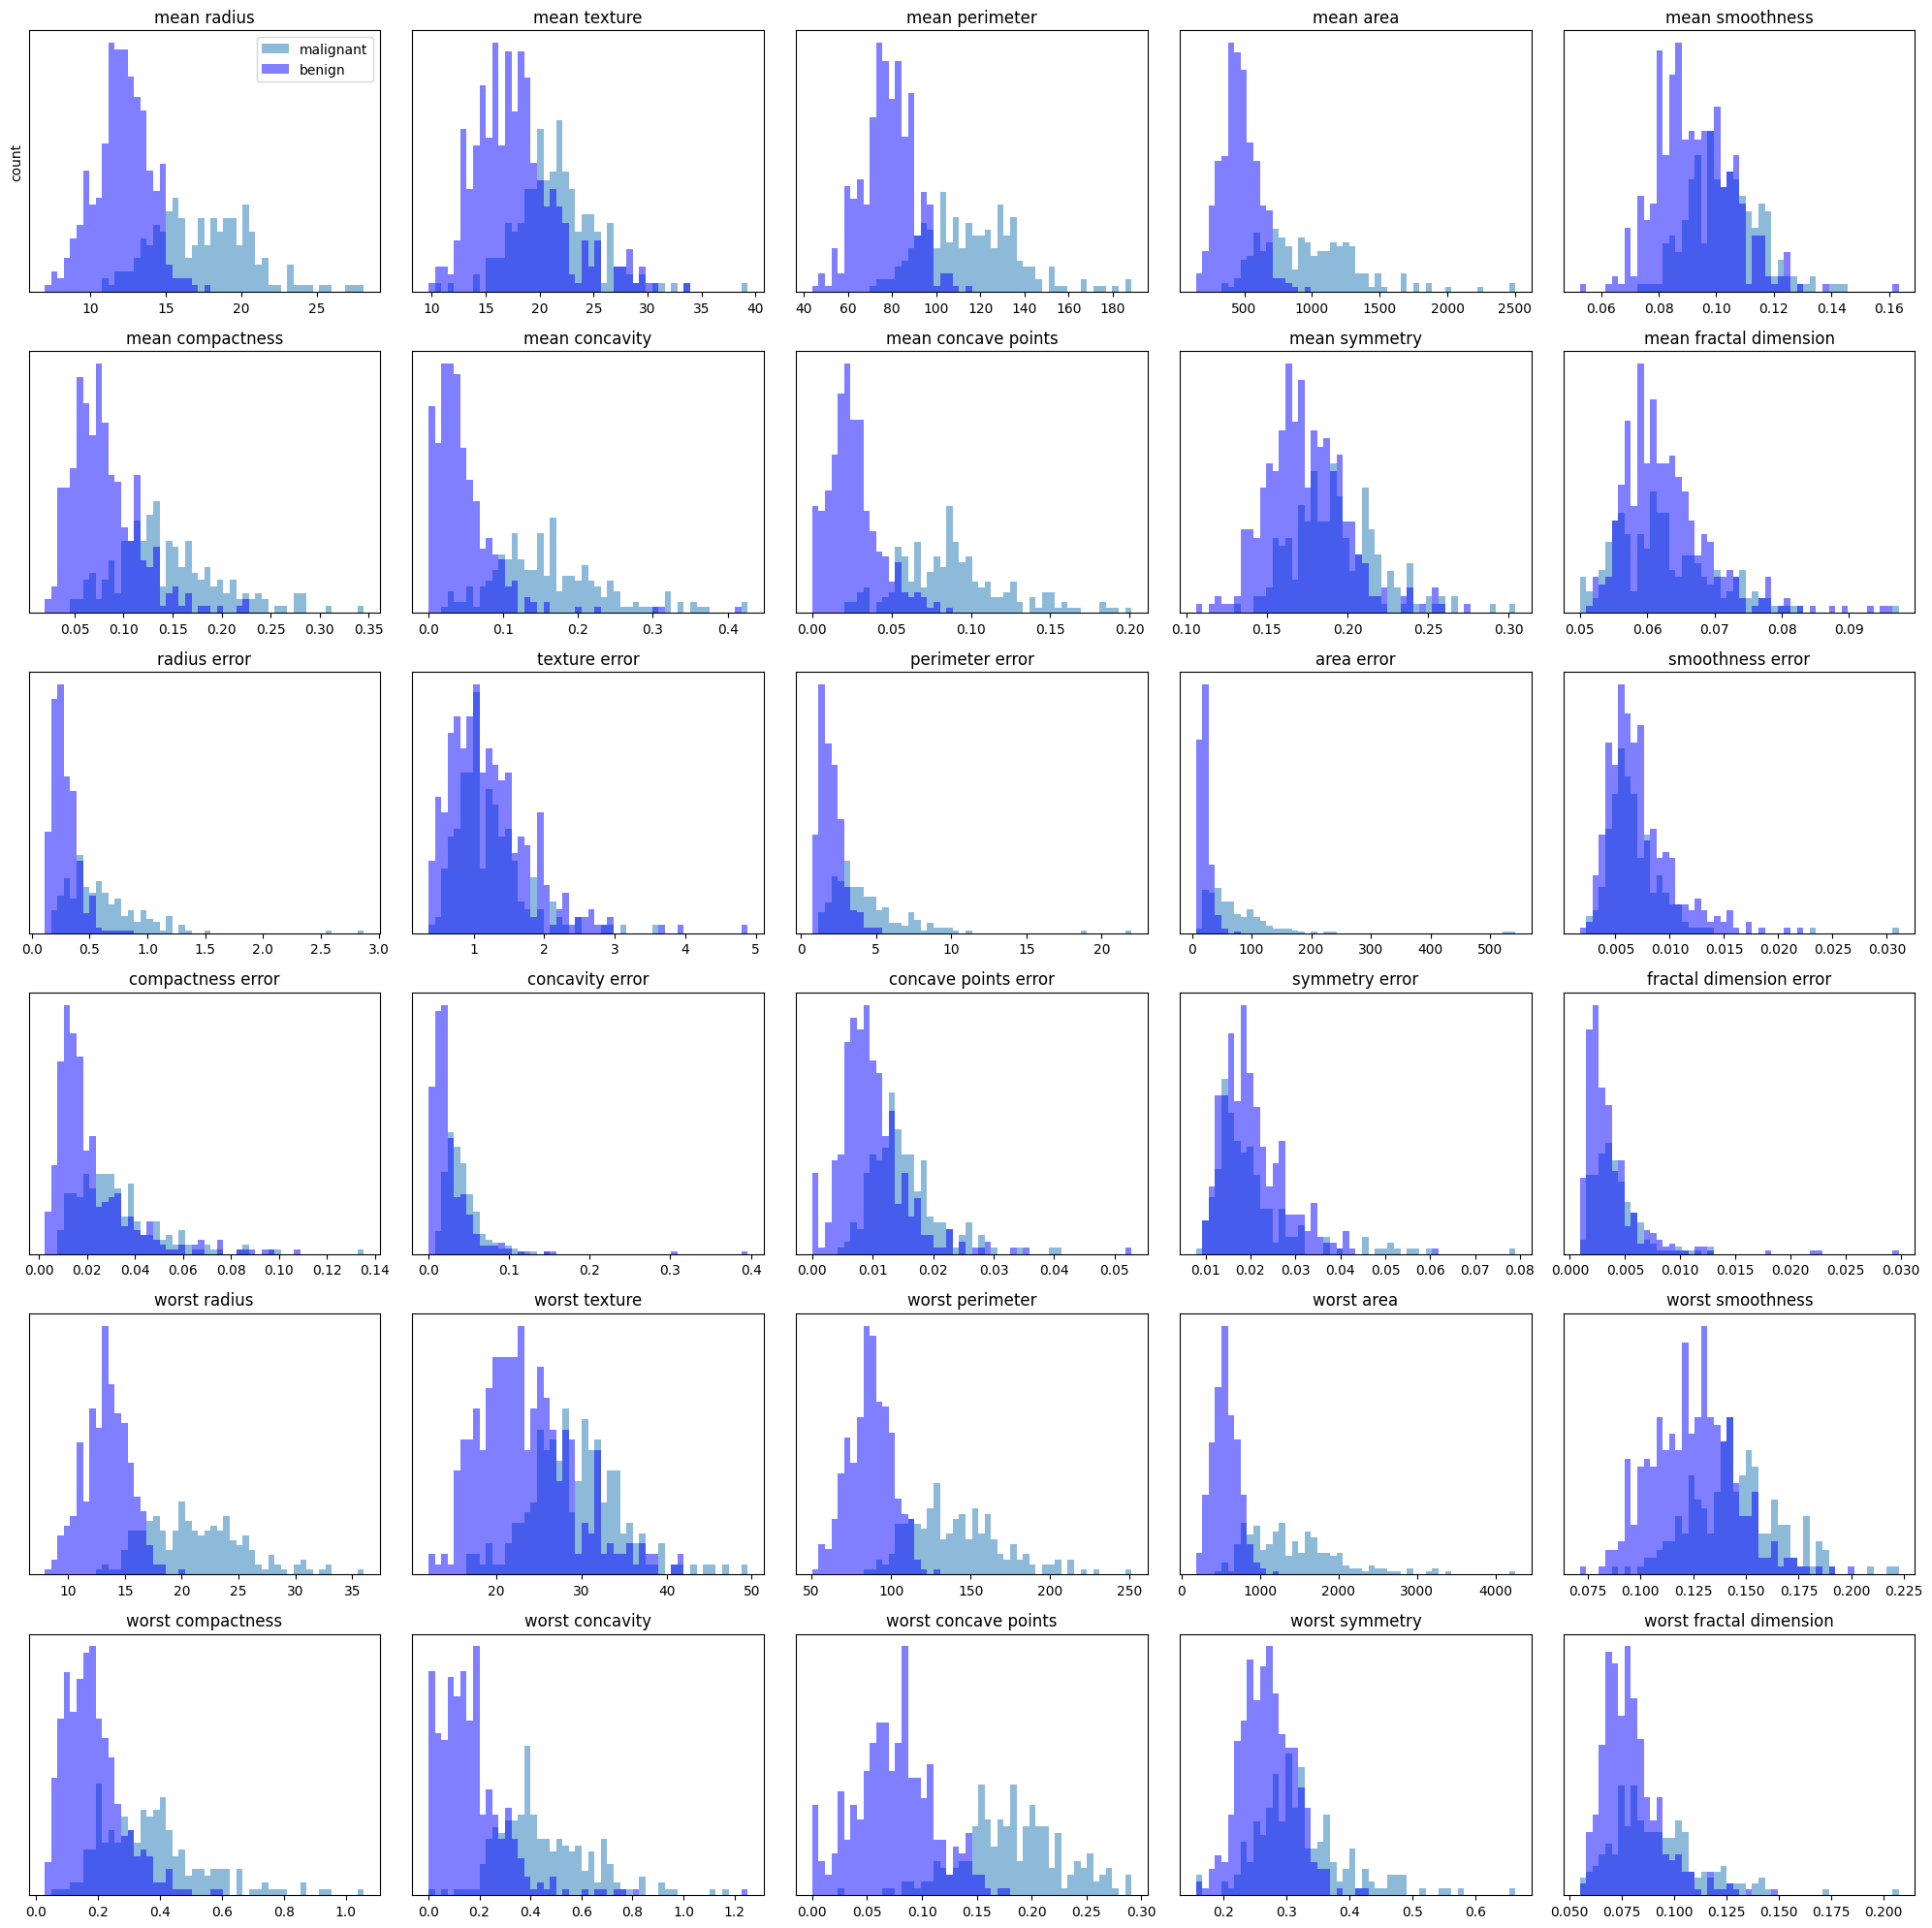

In [20]:
# 9-3-2

from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
malignant = cancer.data[cancer.target==0]
benign = cancer.data[cancer.target==1]


fig,axes= plt.subplots(6,5,figsize=(20,20))
ax = axes.ravel()
for i in range(30):
    _,bins = np.histogram(cancer.data[:,i],bins=50)
    ax[i].hist(malignant[:,i],bins,alpha=.5)
    ax[i].hist(benign[:,i],bins=bins,color='blue',alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())



ax[0].set_ylabel('count')
ax[0].legend(['malignant','benign'],loc='best')
fig.tight_layout()

In [21]:
sc = StandardScaler()
X_std = sc.fit_transform(cancer.data)

pca =  PCA(n_components=2)
pca.fit(X_std)
X_pca = pca.transform(X_std)

print('X_pca shape:{}'.format(X_pca.shape))
print('Explained variance ratio:{}'.format(pca.explained_variance_ratio_))


X_pca shape:(569, 2)
Explained variance ratio:[0.443 0.19 ]


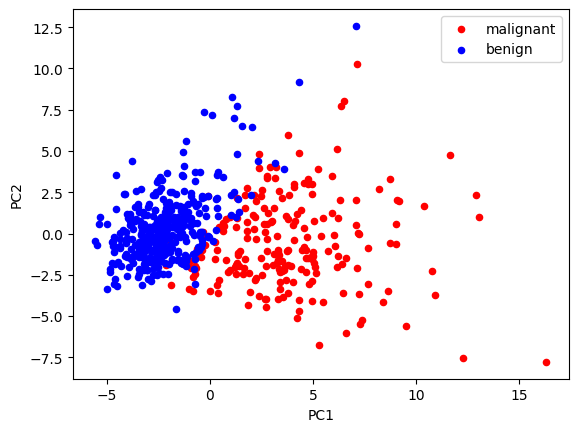

In [22]:
X_pca = pd.DataFrame(X_pca,columns=['PC1','PC2'])
X_pca = pd.concat([X_pca,pd.DataFrame(cancer.target,columns=['target'])],axis=1)

pca_malignant = X_pca[X_pca['target']==0]
pca_benign = X_pca[X_pca['target']==1]

ax = pca_malignant.plot.scatter(x='PC1',y='PC2',color='red',label='malignant')
pca_benign.plot.scatter(x='PC1',y='PC2',color='blue',label='benign',ax=ax);
